# Manipulation de données avec Pandas

In [3]:
import numpy as np
import pandas as pd
import random as rd

In [6]:
pd.Series([1, 2,3], index=["1", "1", "c"])

1    1
1    2
c    3
dtype: int64

## Les objets Pandas

### Series

Créer une *Series* constituée de 4 éléments compris entre 0.25 et 1 compris, linéairement séparés. Vérifier ses attributs.

In [4]:
# Création du tableau de données
data = pd.Series(np.linspace(0.25, 1, 4))
data
# Les valeurs de la Series
data.values
# Les indices
data.index

RangeIndex(start=0, stop=4, step=1)

Sélectionner le deuxième élément des données précédemment créées. Du deuxième à l'avant-dernier.

In [5]:
# Sélection du deuxième élément
data[1]
# Sélection du deuxième et troisième
data[1:4]

1    0.50
2    0.75
3    1.00
dtype: float64

Créer une *Series* reprenant les mêmes données que précédemment mais avec des indices explicitement définis (string). Sélectionner le deuxième élément. 

In [6]:
data = pd.Series(np.linspace(0.25, 1, 4), index=['a', 'b', 'c', 'd'])
data
data['b']

0.5

Créer une série à partir d'un dictionnaire. Ce dictionnaire reprendra les populations de 5 États étatsuniens : 38 332 521 pour la Californie, 26 448 193 pour le Texas, 19 651 127 pour New-York, 19 552 860 pour la Floride et 12 882 135 pour l'Illinois. Afficher la population californienne. La population californienne, du Texas et de New-York.

In [ ]:
# Création du dictionnaire
population_dict = {'Californie': 38_332_521, 'Texas': 26_448_193, 'New-York': 19_651_127, 
                   'Floride': 19_552_860, 'Illinois': 12_882_135}
# Création de la series
population = pd.Series(population_dict)
population
# La population californienne
population['Californie']
# La population des trois premiers États
population['Californie':'New-York']

Californie    38332521
Texas         26448193
New-York      19651127
dtype: int64

Créer une série à partir d'une liste, sans spécifier les indices. À partir d'un scalaire, en spécifiant trois indices. À partir d'un dictionnaire de trois éléments, sans préciser les indices. En précisant deux indices sur les trois du dictionnaire.

In [8]:
# Series à partir d'une liste
x = pd.Series([2, 4, 6])
x

# Series à partir d'un scalaire
x = pd.Series(5, index=[100, 200, 300])
x


# Series à partir d'un dictionnaire
x = pd.Series({2: 'a', 1: 'b', 3: 'c'})
x

# Series à partir d'un dictionnaire avec moins d'indice que de données
x = pd.Series({2: 'a', 1: 'b', 3: 'c'}, index=[3, 2])
x

3    c
2    a
dtype: object

### DataFrame

Créer un nouveau dictionnaire, reprenant cette fois-ci la superficie des États précédent : 423 967 pour la Californie, 695 662 pour le Texas, 141 297 pour New-York, 170 312 pour la Floride, 149 995 pour l'Illinois.
En faire une Series. Créer un DataFrame reprenant l'information sur la population et la superficie des cinq États.

In [9]:
# Création du dictionnaire
area_dict = {'Californie': 423967, 'Texas': 695662, 'New-York': 141297, 'Floride': 170312, 'Illinois': 149995}
# Création de la series
area = pd.Series(area_dict)
area

# Création du DataFrame
states = pd.DataFrame({'population': population, 'area': area})
states

# Les attributs du DataFrame
states.index
states.columns

Index(['population', 'area'], dtype='object')

Sélectionner la colonne correspondant à la population. Celle correspondant à la superficie. Que se passe-t-il si on sélectionne un élément par un indice entier (par exemple 0) ? Un indice de ligne ?

In [81]:
states

,population,area
Californie,38332521,423967
Texas,26448193,695662
New-York,19651127,141297
Floride,19552860,170312
Illinois,12882135,149995


In [82]:
states['population']
states['area']
# states['Californie'] # error

Californie    423967
Texas         695662
New-York      141297
Floride       170312
Illinois      149995
Name: area, dtype: int64

- Construire un DataFrame en partant d'uniquement de la Series population. 
- En précisant ou pas le nom de la colonne. 
- D'une liste de Series. 
- À partir d'un dictionnaire de Series.
- D'une liste de dictionnaire (une liste comprenant trois dictionnaires, chacun mapant un clé 'a' à un entier et une clé 'b' à 2 fois cet entier). 
- Une liste de dictionnaire mais avec des clés manquantes (un dictionnaire avec les clés 'a' et 'b', l'autre avec les clés 'b' et 'c', chacun mapant à un entier). 
- À partir de matrice (en construire une 3x2, préciser les colonnes et les indices).
- À partir d'un tableau Numpy structuré.

In [100]:
# DataFrame à partir d'une Series en précisant le nom de la colonne
pd.DataFrame(population, columns=['population'])
# Sans le préciser
pd.DataFrame(population)
# À partir d'une liste de Series
pd.DataFrame([population, area])
# Pour le faire fonctionner, en passant par la liste
pd.DataFrame(np.array([population, area]).T, columns=['population', 'area'])
# À partir d'un dictionnaire de Series
pd.DataFrame({'population': population, 'area': area})
# À partir d'une liste de dictionnaire
pd.DataFrame([{'a': i , 'b': 2 * i} for i in range(3)])
# List de dictionnaire avec des clés manquantes
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])
# À partir de matrice
pd.DataFrame(np.random.rand(3, 2), columns=['beta', 'alpha'], index=['a', 'b', 'c'])
# À partir d'un tableau hétérogène numpy
# pd.DataFrame(np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')]))

,beta,alpha
a,0.202643,0.112213
b,0.776574,0.408410
c,0.910486,0.078952


### Index

Instancier un objet Index comme une liste de 5 entiers. Sélectionner le deuxième élément. Un sur deux. Afficher les différents attributs de l'objet. Modifier la valeur du premier élément de l'Index.

In [105]:
# Création d'un objet Index
ind = pd.Index([2, 3, 5, 7, 11])
ind
# Deuxième élément
ind[1]
# Un élément sur deux
ind[::2]
# Les attributs
print("La taille de ind :", ind.size)
print("Le shpe de ind :", ind.shape)
print("Le nombre de dimension :", ind.ndim)
print("Le type :", ind.dtype)
# Modification de la première valeur
try:
    ind[0] = 0
except Exception as e:
    print(e)

La taille de ind : 5
Le shpe de ind : (5,)
Le nombre de dimension : 1
Le type : int64
Index does not support mutable operations


Créer deux $\texttt{Index}$, le premier composé de [1, 3, 5, 7, 9], le deuxième [2, 3, 5, 7, 11]). Regarder l'intersecton de ces deux objets, leur union, leur différence symmétrique.

In [6]:
# Création des deux instances
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

# Intersection
print(indA.intersection(indB))
# Union
print(indA.union(indB))
# Différence symétrique
print(indA.symmetric_difference(indB))

Index([3, 5, 7], dtype='int64')
Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')
Index([1, 2, 9, 11], dtype='int64')


## Indiçage et sélection

### Cas unidimensionnel : les Series

Repartir de la première Series créée, constituée de 4 éléments compris entre 0.25 et 1 compris avec les indices explicites. En sélectionner des éléments. Afficher ses clés et items.Y ajouter un 5ème élément.

In [104]:
# Création de la Series
data = pd.Series(np.linspace(0.25, 1, 4), index=['a', 'b', 'c', 'd'])
data
# Sélection d'un élément
data['b']
# Clés et items 
data.keys()
data.items()
# Ajout d'un élément supplémentaire
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Sélectionner les trois premiers éléments en utilisant les indices explicites. Les indices implicites. Sélectionner les éléments supérieurs à 0.3 et inférieurs à 0.8. Le premier et le dernier élément.

In [15]:
# Trois premiers éléments via les indices explicites
data['a':'c']
# Trois premiers éléments via les indices implicites
data[0:2]
# Les éléments supérieurs à 0.3 et inférieurs à 0.8
data[(data > 0.3) & (data < 0.8)]
# Le premier et le dernier élément
data[['a', 'e']]
# Via les indices implicites
data[[0, 4]]

a    0.25
e    1.25
dtype: float64

Créer une série de trois éléments dont les indices sont [1, 3, 5]. Sélectionner le premier élément. Les deux derniers éléments.

In [16]:
# Création Series
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data
# Sélection premier élément
data[1]
# data[0] # -> erreur, utilisation implicite des indices explicites
# Sélection des deux premiers éléments
data[1:3]
data[3:5] # Series vide, utilisation implicite des indices implicite

Series([], dtype: object)

Sélectionner le premier élément en faisant explicitement appel à son indice explicite. Les deux derniers éléments en faisant appel à leurs indices explicites.
Sélectionner le premier élément en faisant explicitement appe à son indice implicite. Les deux derniers éléments en faisant appel à leurs indices implicites.

In [17]:
# Le premier élément en utilisant les indices explicites
data.loc[1]
# Les deux derniers éléments en utilisant les indices explicites
data.loc[3:5]
# Le premier élément en utilisant les indices implicites
data.iloc[0]
# Les deux derniers éléments en utilisant les indices implicites
data.iloc[1:3]

3    b
5    c
dtype: object

### Cas multidimensionnels : les DataFrame

Reprendre le DataFrame constitué de la surface et de la population des cinq États étatsuniens. Sélectionner l'une ou l'autre des variables. Créer une troisième variable, la densité, comme la division de la population par la superficie. 

In [18]:
# Le DataFrame
states
# Sélection de la variable population
states['population']
# Sélection de la variable area via le style attribut (déconseillé en pratique)
states.area
# Création d'une troisième variable
states['density'] = states['population'] / states['area']
states

,population,area,density
Californie,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New-York,19651127,141297,139.076746
Floride,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


Afficher l'ensemble des valeurs du DataFrame comme un ndarray. En prendre la première ligne. Transposer l'ensemble du tableau.

In [19]:
# Le DataFrame comme ndarray
states.values
# Première ligne 
states.values[0]
# La transposée
states.T

,Californie,Texas,New-York,Floride,Illinois
population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


Sélectionner les trois premières lignes et les deux premières colonnes en utilisant les indices explicites. En faisant appel aux indices implicites. Sélectionner la population et la densité des États dont la densité est supérieure à 100. Changer la densité de la Californie = 90.

In [20]:
# Les trois premières lignes et les deux premières colonnes par les indices explicites
states.loc[:'New-York', :'area']
# Indices implicites
states.iloc[:3, :2]
# La population et la densité des États dont la densité est supérieure à 100
states.loc[states['density'] > 100, ['population', 'density']]
# Changer la valeur de la densité en Californie
# Via loc
states.loc['Californie', 'density'] = 90
states
# Via iloc
states.iloc[0, 2] = 42
states

,population,area,density
Californie,38332521,423967,42.000000
Texas,26448193,695662,38.018740
New-York,19651127,141297,139.076746
Floride,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


## Opérations

### Préservation des indices

Créer une Series de quatre entiers aléatoires compris entre 0 et 10. En calculer l'exponentielle.
Créer un DataFrame de quatres variables composées de trois observations, des entiers aléatoires. Calculer $sin(\frac{X\pi}{4}$

In [61]:
# On fixe une graine pour la reproductibilité des résultats
rd = np.random.RandomState(0)

# Series de 4 entiers aléatoires.
x = pd.Series(rd.randint(0, 10, 4))
x
# Exponentielle de x
np.exp(x)

# DataFrame
df = pd.DataFrame(rd.randint(0, 10, (3, 4)), columns=['a', 'b', 'c', 'd'])
df
# Calcul
np.sin(df * np.pi / 4)

,a,b,c,d
0,-7.071068e-01,7.071068e-01,0.707107,-0.707107
1,1.000000e+00,1.224647e-16,-0.707107,-1.000000
2,-2.449294e-16,-2.449294e-16,0.707107,-1.000000


### Alignement des indices

Construire deux Series, un reprenant la superficie de trois États étatsuniens, l'Alaska avec 1 723 337, le Texas avec 695 662 et la Californie avec 423 967, et l'autre reprenant la population de trois États, la Californie avec 38 332 521, le Texas avec 26 448 193 et New-York avec 19 651 127. Calculer la densité de ces États en divisant la population par la superficie.  

In [22]:
# Création des Series
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'Californie': 423967}, name='area')
population = pd.Series({'Californie': 38332521, 'Texas': 26448193, 'New-York':19651127}, name='population')
# Calcul de la densité de population
print("Densité de population :", population / area)

Densité de population : Alaska              NaN
Californie    90.413926
New-York            NaN
Texas         38.018740
dtype: float64


Créer deux Series de trois entiers. Les indices de la première sont [0, 1, 2], ceux de la deuxième [1, 2, 3].
Sommer les deux séries. Faire la même chose en remplaçant les observations NaN par des 0.

In [23]:
# Les deux Series
A = pd.Series(rd.randint(0, 5, 3), index=np.arange(3))
print(A)
B = pd.Series(rd.randint(5, 10, 3), index=np.arange(1, 4))
print(B)
# Somme des deux
print(A + B)
# Somme des deux avec remplacement par zéros
print(A.add(B, fill_value=0))

0    0
1    1
2    1
dtype: int64
1    5
2    6
3    9
dtype: int64
0    NaN
1    6.0
2    7.0
3    NaN
dtype: float64
0    0.0
1    6.0
2    7.0
3    9.0
dtype: float64


Créer deux DataFrames, l'un de deux colonnes pour deux observations, l'autre de trois variables pour trois observations. Faire la somme des deux DataFrame. Faire la somme de telle manière à remplir les valeurs manquantes par des 0. Par la moyenne totale du premier DataFrame.

In [24]:
# DataFrame
df1 = pd.DataFrame(rd.randint(0, 20, (2, 2)), columns=list('AB'))
print(df1)
df2 = pd.DataFrame(rd.randint(0, 10, (3, 3)), columns=list('BAC'))
print(df2)
# Somme des deux
print(df1 + df2)
# Remplissage par zéro
print(df1.add(df2, fill_value=0))
# Remplissage par la moyenne totale de df1
fill = df1.stack().mean()
print(df1.add(df2, fill_value=fill))

    A   B
0  19  16
1  19   5
   B  A  C
0  0  2  3
1  8  1  3
2  3  3  7
      A     B   C
0  21.0  16.0 NaN
1  20.0  13.0 NaN
2   NaN   NaN NaN
      A     B    C
0  21.0  16.0  3.0
1  20.0  13.0  3.0
2   3.0   3.0  7.0
       A      B      C
0  21.00  16.00  17.75
1  20.00  13.00  17.75
2  17.75  17.75  21.75


### Opérations entre DataFrame et Series

Créer un DataFrame de 4 variables et trois observations par variable. Faire la différence entre le DataFrame et la première ligne du DataFrame. Soustraire la deuxième colonne. Soustraire par le premier élément de la deuxième et quatrième colonne.

In [25]:
# Définition du DataFrame
df = pd.DataFrame(rd.randint(0, 10, size=(3, 4)), columns=list('QRST'))
df
# Soustraction DataFrame par Series sur les lignes
df - df.iloc[0]
# Soustraction DataFrame par Series sur les colonnes
df.subtract(df['R'], axis=0)
# Soustraction premier élément d'une colonne sur deux
df - df.iloc[0, ::2]

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,0.0,NaN,-2.0,NaN
2,2.0,NaN,-7.0,NaN


## Gérer les données manquantes

### Données manquantes avec Pandas

Calculer le temps nécessaire pour faire la somme d'une suite de 1e6 entiers, selon que le type du tableau soit \texttt{object} ou \texttt{int}.

In [35]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    print(np.arange(1E6, dtype=dtype).sum())
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
499999500000
81.5 ms ± 4.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
499999500000
3.38 ms ± 578 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



Créer un tableau consituté de 3 entiers et d'un objet. Essayer de calculer la somme de ces valeurs.

In [34]:
x = np.array([1, None, 3, 4])
print(x)
try:
    x.sum()
except Exception as e:
    print(e)

[1 None 3 4]
unsupported operand type(s) for +: 'int' and 'NoneType'


Construire le même tableau mais avec un NaN au lieu d'un objet None. Vérifier le type. En calculer la somme avec les fonctions usuelles. Avec les fonctions attribuées.

In [28]:
# Création du ndarray
x = np.array([1, np.nan, 3, 4])
# Type du tableau
print(x.dtype)
# Calcul de la somme
print(x.sum())
# Via la fonction gérant les NaN
print(np.nansum(x))

float64
nan
8.0


Construire une Series constitué de 2 entiers, d'une Nan et d'un None. Vérifier son type.
Construire une Series d'une suite d'entier en spécifiant le type comme int. Changer la permière valeur pour un objet None. Vérifier l'impact sur le type.

In [10]:
# Series de 2 entiers, une NaN et un None
x = pd.Series([1, np.nan, 2, None])
print(x.dtype)

# Series d'une suite d'entier
x = pd.Series(np.arange(5), dtype=int)
print(x)
# Changement de la première valeur pour un None
x[0] = None
x

float64
0    0
1    1
2    2
3    3
4    4
dtype: int64


0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

### Opérations sur les valeurs nulles

Soit une Series constituée d'un entier, d'une NaN, d'un string et d'un None. Renvoyer un masque booléen disant si chaque valeur est manquante ou pas. Sélectionner le sous-ensemble de valeurs non nulles. Supprimer les valeurs nulles.

In [30]:
# Une Series
x = pd.Series([1, np.nan, 'hello', None])
x
# Booléen manquante ou pas
x.isnull()
# Sous-ensemble de valeurs non nulles
x[x.notnull()]
# Suppression des valeurs manquantes
x.dropna()

0        1
2    hello
dtype: object

Soit une matrice 
$\begin{pmatrix}
1 & np.nan & 2\\
2 & 3 & 5\\
np.nan & 4 & 6
\end{pmatrix}$.
L'utiliser pour en faire un DataFrame.  Voir ce qu'il se passe si on supprime les valeurs manquantes. En le faisant pour les colonnes. Ajouter une quatrième colonne composée de NaN puis supprimer les colonnes composée exclusivement de NaN. Supprimer les lignes qui n'ont pas au moins 3 valeurs non nulles.

In [125]:
# Création du DataFrame
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, 6]])
df
# Suppression des NaN
df.dropna()
# Suppression des NaN par colonnes
df.dropna(axis=1)
# Ajout d'une quatrième colonne constituée de NaN
df[3] = np.nan
df
# Suppression des colonnes composée exclusivement de NaN, pas des autres
df.dropna(axis='columns', how='all')
# Suppression des lignes qui n'ont pas au moins 3 valeurs non nulles
df.dropna(axis=0, thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


Soit une Series [1, np.nan, 2, None, 3]. Remplacer les valeurs manquantes par des 0. Par la valeur précédente. Par la valeur suivante. Faire la même chose sur le DataFrame précédent, en précisant l'axe.

In [32]:
# Création Series
x = pd.Series([1, np.nan, 2, None, 3])
x
# Remplacement des NaN par des 0
x.fillna(0)
# Par la valeur précédente
x.fillna(method='ffill')
# Par la valeur suivante
x.fillna(method='bfill')
# Sur le DataFrame
print(df.fillna(method='ffill', axis=1))
print(df.fillna(method='bfill', axis=0))

     0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0
     0    1  2   3
0  1.0  3.0  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN


## Indiçage hiérarchique

### Series multiplement indicées

Créer deux listes, une contenant les populations des États de Californie, de New-York et du Texas en 2000 et 2010, l'autre reprenant les clés de ces données, mises sous forme de tuples, [('Californie', 2000), ('Californie', 2010), ('New-York', 2000), ('New-York', 2010), ('Texas', 2000), ('Texas', 2010)] et les population respectives : [33871648, 37253956, 18976457, 19378102, 20851820, 25145561].
Instancier un objet MultiIndex à partir des indices à disposition et réindicer la population via ces indices. Sélectionner les populations de l'année 2010.

In [33]:
# Les indices
index = [('Californie', 2000), ('Californie', 2010), 
          ('New-York', 2000), ('New-York', 2010), 
          ('Texas', 2000), ('Texas', 2010)]
# Les populations
population = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
# Création de la Series
pop = pd.Series(population, index=index)
pop

# Instanciation d'un objet MultiIndex
index = pd.MultiIndex.from_tuples(index)
index
# Ré-instanciation de la Series 
pop = pop.reindex(index)
pop

# Les populations en 2010
pop[:, 2010]

Californie    37253956
New-York      19378102
Texas         25145561
dtype: int64

Transformer la Series multiplement indicée en DataFrame. Retourner à la Series. Créer un DataFrame constitué de la Series, qui sera la variable 'total', et d'une autre qui sera la population de moins de 18 ans pour chaque État.  En Californie, elle est de 9267089 en 2000 et 9284094 en 2010, à New-York 4687374 en 2000 et 4318033 en 2010, au Texas elle est de 5906301 en 2000 et 6879014 en 2010. Créer une troisième variable qui sera la proportion de moins de 18 ans dans chaque État au deux points du temps

In [34]:
# Retrouver un DataFrame
pop.unstack()
pop.unstack().stack() # Dans l'autre sens

# Création DataFrame
df = pd.DataFrame({'total': pop, 'under18': [9267089, 9284094, 4687374, 4318033, 5906301, 6879014]})
df
# Proportion
df['ratio'] = df['under18'] / df['total']
df

total  under18     ratio
Californie 2000  33871648  9267089  0.273594
           2010  37253956  9284094  0.249211
New-York   2000  18976457  4687374  0.247010
           2010  19378102  4318033  0.222831
Texas      2000  20851820  5906301  0.283251
           2010  25145561  6879014  0.273568

### Création de MultiIndex

Créer un DataFrame avec des indices hiérarchiques (observation a et b, avec un niveau 1 et 2 pour chacun d'entre eux), constitué de deux variables X et Y. Prendre des valeurs aléatoires.
Créer un dictionnaire reprenant les populations des trois États en 2000 et 2010 avec pour clés les tuples précédemment créés. Créer une Series hiérarchiquement indicée à partir de ce dictionnaire.

In [35]:
# Création DataFrame avec indiçage hiérarchique dans l'option index
df = pd.DataFrame(np.random.rand(4, 2), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], columns=['X', 'Y'])
print(df)
# Création Series avec indiçage hiérarchique via l'utilisation de dictionnaire et tuples
data = {('Californie', 2000): 33871648, ('Californie', 2010): 37253956, 
          ('New-York', 2000): 18976457, ('New-York', 2010): 19378102, 
          ('Texas', 2000): 20851820, ('Texas', 2010): 25145561}
pd.Series(data)

            X         Y
a 1  0.307534  0.670920
  2  0.298061  0.110926
b 1  0.949883  0.778034
  2  0.940670  0.240641


Californie  2000    33871648
            2010    37253956
New-York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

En reprenant le schéma hiérarchique précédent (deux observations a et b, deux niveaux pour chaque), instancier un objet MultiIndex en utilisant les différentes méthodes : from_arrays, from_tuples, from_product, en spécifiant directement les levels et labels.

In [36]:
# from_arrays
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])
# from_tuples
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])
# from_product
print(pd.MultiIndex.from_product([['a', 'b'], [1, 2]]))
# Encodage interne
print(pd.MultiIndex(levels=[['a', 'b'], [1, 2]], codes=[[0, 0, 1, 1], [0, 1, 0, 1]]))

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )
MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )


Reprendre le DataFrame de la population des trois États en 2000 et 2010. Renommer ses indices pour distinguer l'État en question et l'année de l'observation.

In [37]:
# Renommer les noms des indices
df.index.names = ['state', 'year']
df

X         Y
state year                    
a     1     0.307534  0.670920
      2     0.298061  0.110926
b     1     0.949883  0.778034
      2     0.940670  0.240641

Créer un objet MultiIndex croisant les années 2013, 2014 et les visites 1  et 2. Créer un second objet MultiIndex, pour les colonnes, croisant les noms, Bob, Guido et Sur, avec un second niveau correspondant au type dont les valeurs sont HR et Temp.
Créer des valeurs aléatoires pour ces données (via une matrice de taille 4x6 par exemple).
Créer un DataFrame reprenant ces données.
Vérifier l'état de santé de Guido

In [38]:
# Indices hiérarchiques 
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
# Colonnes hiérarchiques
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']], names=['subject', 'type'])
# Création de données fictives
data = np.round(np.random.uniform(30, 50, (4, 6)), 1)
# Création du DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data
# État de santé de Guido
health_data['Guido']

type          HR  Temp
year visit            
2013 1      43.3  35.3
     2      48.4  48.2
2014 1      49.3  44.9
     2      39.9  30.4

### Sélection avec MultiIndex

Reprendre la Series sur les populations d'État en 2000 et 2010. Trouver la population de la Californie. de la Californie en 2000. Les populations de la Californie et de New-York aux deux moments. La population de tous les États en 2000. Les États dont la population est supérieure à 22 millions (et à quelle année ?). Les populations de la Californie et du texas.

In [39]:
# On reprend la Series avec indices hiérarchiques
pop
# La population de la Californie
pop['Californie']
# La population de la Californie en 2000
pop['Californie', 2000]
# Les populations de la Californie et de New-York aux deux moments
pop.loc['California':'New-York']
# La population de tous les États en 2000
pop[:, 2000]
# Les États dont la population est supérieure à 22 millions
pop[pop > 22000000]
# Les populations de la Californie et du Texas
pop[['Californie', 'Texas']]

Californie  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

Reprendre les données de santé du dataFrame en dimension 4. Vérifier la fréquence cardiaque de Guido pour toutes les visites. La fréquence cardiaque et la température de Bob pour les deux visites de 2013. La température de Sue à la première visite de 2014.

In [40]:
# Le DataFrame
health_data
# Fréquence cardiaque de Guido pour toutes les visites
health_data['Guido', 'HR']
# Avec loc
health_data.loc[:, ('Guido', 'HR')]
# Avec iloc
health_data.iloc[:, 2:3]
# La fréquence cardiaque et la température de Bob pour les deux visites de 2013
health_data.loc[2013, 'Bob']
health_data.iloc[:2, :2]
# La température à la première visite de 2014 de Sue
health_data.loc[(2014, 1), ('Sue', 'Temp')]
health_data.iloc[2, 5]

32.8

Trouver la fréquence cardiaque de tous les individus aux premières visites. La température de Bob et Guido sur les deux visites de 2013.

In [41]:
# Instance de l'objet IndexSlice
idx = pd.IndexSlice
# Fréquence cardiaque de tous les individus aux premières visites
health_data.loc[idx[:, 1], idx[:, 'HR']]
# La température de Bob et Guido sur les deux visites de 2013
health_data.loc[idx[2013, :], idx['Bob':'Guido', 'Temp']]

subject      Bob Guido
type        Temp  Temp
year visit            
2013 1      34.1  35.3
     2      47.1  48.2

### Réarrangement d'indices multiples

Instancier un MultiIndex qui soit le produit de ['a', 'c', 'b'] et [1, 2]. Créer une Series de 6 valeurs aléatoires dont les indices soit cette instance. Afficher les données de a à b via slicing.

In [54]:
# Création des indices
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
# Création de la Series
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data
# Si on affiche les données de a à b
try:
    data['a':'b']
except Exception as e:
    print(e)

'Key length (1) was greater than MultiIndex lexsort depth (0)'


Ranger la series de telle sorte qu'il soit possible d'afficher les valeurs de a à b.

In [43]:
# On range les données
data = data.sort_index()
data
# On affiche les données via slicing
data['a':'b']

char  int
a     1      0.203195
      2      0.093546
b     1      0.414781
      2      0.678943
dtype: float64

Reprendre la Series sur la populatiton des trois États en 2000  et 2010. La convertir en un DataFrame dont les colonnes sont les États. Dont les colonnes sont les années. Revenir à l'État initial à partir d'un des DataFrame

In [44]:
# Series
pop
# DataFrame avec État en colonne
pop.unstack(level=0)
# DataFrame avec années en colonne
pop.unstack(level=1)
# Retour Series hiérarchique
pop.unstack().stack()
pop

Californie  2000    33871648
            2010    37253956
New-York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## Fusionner des datasets

### Concat

Programmer une fonction prenant en entrée des colonne et des ligne et qui produit en sortie un DataFrame. Les données qui le constitue peuvent être choisies arbitrairement.

In [ ]:
def make_df(rows: int, cols: int) -> pd.DataFrame:
    """
    Créer un DataFrame du nombre de colonnes et indices spécifié,
    constitué de valeurs aléatoires tirées dans une distibution 
    uniforme définie sur [0,1)

    Arguments
    ---------
    cols : int or string
        Nombre de colonnes constituant le DataFrame.
    rows : int or string
        Nombre de ligne des indices consitutant le DataFrame.

    Returns
    -------
    df : pd.DataFrame
        DataFrame indxcols
    """

    return pd.DataFrame(np.random.rand(rows, cols), range(rows))


make_df(3, 3)

,0,1,2
0,0.952456,0.787582,0.549839
1,0.139965,0.640874,0.162775
2,0.945208,0.669524,0.536192


Créer deux Series et les concaténer. Faire la même chose avec des DataFrame. Concaténer en collant les colonnes. Concaténer sur les lignes, en mettant à jour les indices. Concaténer en faisant de chaque source de données un niveau d'indiçage. Jouer avec les différentes options.

In [127]:
# Deux Series en spécifiant les indices
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index =[4, 5, 6])
pd.concat([ser1, ser2])
# Sans spécifier les indices
ser1 = pd.Series(['A', 'B', 'C'])
ser2 = pd.Series(['D', 'E', 'F'])
pd.concat([ser1, ser2])
# Deux DataFrame
df1 = make_df(2, 2)
df2 = make_df(2, 2)
pd.concat([df1, df2])
# Concaténation via l'axe 1
pd.concat([df1, df2], axis=1)
# Concaténation en ignorant les indices
pd.concat([df1, df2], axis=0, ignore_index=True)
# Concaténation avec MultiIndex
pd.concat([df1, df2], keys=['df1', 'df2'])
# Pour s'assurer qu'il n'y a pas d'overlap entre les indices lors de la concaténation
# print(pd.concat([df1, df2], verify_integrity=True))

0         1
df1 0  0.527279  0.812106
    1  0.489611  0.437732
df2 0  0.912039  0.843665
    1  0.416781  0.611610

Créer deux DataFrame de trois colonnes.  Renommer une colonne d'un des deux. Concaténer les. Concaténer les de telles façons à ne conserver que les variables communes.

In [57]:
df1 = make_df(3, 3)
df2 = make_df(3, 3)
df2.columns = [0, 1, 4]
print(df1)
print(df2)
# Concaténation avec union
pd.concat([df1, df2])
# Concaténation avec intersection
pd.concat([df1, df2], join='inner')

          0         1         2
0  0.531594  0.432579  0.777224
1  0.993425  0.042568  0.832472
2  0.635882  0.299720  0.051944
          0         1         4
0  0.230394  0.050349  0.601006
1  0.970546  0.220002  0.589738
2  0.982742  0.551757  0.129003


,0,1
0,0.531594,0.432579
1,0.993425,0.042568
2,0.635882,0.299720
0,0.230394,0.050349
1,0.970546,0.220002
2,0.982742,0.551757


### Append

Concaténer deux dataframe en passant par une méthode au lieu d'une fonction. Vérifier que l'ajout soit effectif.

In [59]:
df1 = make_df(3, 3)
df2 = make_df(3, 3)

### METHOD APPEND N'EXISTE PLUS ####

# # On ajoute df2 à df1
# df1.append(df2)
# # Vérification
# df1
# # On ajoute effectivement
# df1 = df1.append(df2)
# df1

### Merge

Créer un DataFrame de deux variables, le nom des employés et leur groupe de travail. Bob est en Accounting, Jake en Engineering, Lisa aussi et Sue en HR. Créer un deuxième DataFrame qui reprend le nom des employés avec leur date d'entrée, 2004 pour Lisa, 2008 pour Bob, 2012 pour Jake et 2014 pour Sue. Regrouper l'information en la faisant correspondre.

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'], 
                   'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                   'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Créer un DatFrame donnant le superviseur selon le groupe. l'Accounting est supervisé par Carly, l'Engineering par Guido, les HR par Steve. Assicuer cette information à la précédente.

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})
df5 = pd.merge(df3, df4)
df5

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


Créer un DataFrame qui reprend les compétences des différents groupes. Chaque groupe a deux compétences : math et spreadsheets pour l'Accounting, coding et linux pour l'Engineering, spreadsheets et organization pour les HR. Ajouter cette information à la precédente

In [ ]:
df6 = pd.DataFrame({'group': ['Accounting', 'Accounting', 'Engineering', 'Engineering', 'HR', 'HR'],
                   'skills': ['math', 'spreadsheets', 'coding', 'linux', 'spreadsheets', 'organization']})
df7 = pd.merge(df5, df6)
df7

,employee,group,hire_date,supervisor,skills
0,Bob,Accounting,2008,Carly,math
1,Bob,Accounting,2008,Carly,spreadsheets
2,Jake,Engineering,2012,Guido,coding
3,Jake,Engineering,2012,Guido,linux
4,Lisa,Engineering,2004,Guido,coding
5,Lisa,Engineering,2004,Guido,linux
6,Sue,HR,2014,Steve,spreadsheets
7,Sue,HR,2014,Steve,organization


Repartir des deux premiers DataFrame.spécifier explicitement quelle clé doit être utilisée pour faire la jointure.

In [ ]:
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Créer un DataFrame dans lequel on a les salaires des employés. Bob gagne 70000, Jake 80000, Lisa 120000 et Sue 90000. Donner un nom différent à la variable des noms que celui donné sur le premier DataFrame, puis les fusionner en faisant correspondre les informations malgré tout. Supprimer l'information redondante.

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'salary': [70000, 80000, 120000, 90000]})
pd.merge(df1, df8, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


Changer les indices du premier et du deuxième DataFrame par le nom des employés. Fusionner ensuite ces deux DataFrame en utilisant les indices comme clé. Fusionner les deux en utilisant les indices comme clé. Fusionner ensuite le premier DataFrame avec le deuxième dont les indices ont été modifiés.

In [ ]:
# On change les indices pour la variable employee
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
df1a
df2a
# Merge avec indice         
pd.merge(df1a, df2a, left_index=True, right_index=True)
# Merge avec indice sur un
pd.merge(df1, df2a, left_on='employee', right_index=True)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Créer deux DataFrame, l'un donnant ce qu'une personne mange, l'autre ce qu'elle boit. Peter mange du poisson, Paul des haricots et Mary du pain. Mary boit du vin et Joseph de la bière. Fusionner ces deux DataFrame, de telle façon que seul les individus pour qui toute l'information est connue soit gardée. Le faire de telle façon qu'on ne perde aucune information. En gardant le plus d'information sur la nourriture et en prenant l'information sur la boisson si elle est accessible pour les individus dont on a l'information sur ce qu'ils mangent. Le plus d'information sur la boisson.

In [ ]:
df9 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']})
df10 = pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']})
# Fusion par intersection, information commune
pd.merge(df9, df10, how='inner')
# Fusion par union, toute l'info
pd.merge(df9, df10, how='outer')
# Fusion nourriture et intersection nourriture et boisson
pd.merge(df9, df10, how='left')
# Fusion boisson et intersection nourriture et boisson
pd.merge(df9, df10, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


Créer deux DataFrame, chacun constitué du nom des employés et de leur rang. Un classe Bob 1, Jake second, Lisa troisième et Sue quatrième, l'autre Jake premier, Sue deuxième, Bob troisième et Lisa quatrième. Fusionner les deux DataFrame par les noms. Changer les suffixes des variables conservées.

In [ ]:
df11 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [1, 2, 3, 4]})
df12 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 'rank': [3, 1, 4, 2]})
pd.merge(df11, df12, on='name')
pd.merge(df11, df12, on='name', suffixes=['_L', '_R'])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


## Aggregation et groupement

### Simple aggrégation

Créer une Series à partir de valeurs aléatoires. Calculer la somme et la moyenne de cette série. Créer une deuxième série qui soit aussi constituée de valeurs aléatoires et construire un DataFrame des deux Series. Calculer la moyenne du DataFrame. Sur un aaxe et sur un autre.

In [ ]:
# Création des series
ser1 = pd.Series(np.random.rand(5))
ser2 = pd.Series(np.random.rand(5))
# Somme
ser1.sum()
# Moyenne
ser2.mean()
# DataFrame
df = pd.DataFrame({'A': ser1, 'B': ser2})
df
# Moyenne df
df.mean()
df.mean(axis='columns')

0    0.586873
1    0.589123
2    0.680595
3    0.365585
4    0.885412
dtype: float64

Installer le package seaborn. Charger le dataset planets du package, qui regroupe des informations sur la découverte d'exoplanète jusqu'en 2014. Afficher les dimensions des données et les cinq premières lignes du DataFrame. Afficher les statistiques descriptives du dataFrame.

In [18]:
# Installation par pip
# ! pip install seaborn
# Installation par conda
# ! conda install seaborn
# Installation par conda mais en ne prenant pas le canal par défaut, pour avoir une version posssiblement plus récente
#! conda install -c conda-forge seaborn 
import seaborn as sns
planets = sns.load_dataset('planets')
print(planets.shape)
planets.head()
planets.dropna().describe()

(1035, 6)


,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### groupby

Créer un DataFrame de deux variables : une variable data comme une suite de 6 entier, une variable key, égale à A, B, C, A, B, C. Faire la somme d'observations par clé.

In [19]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 'data': range(6)})
# Si on applique la méthode groupby
df.groupby('key')
# On fait la somme des valeurs par clé
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


Reprendre le DataFrame des exoplanètes. En le groupant par la méthode de découverte, donner la médiane des périodes orbitales. Itérer à travers les groupes pour avoir le shape des sous-DataFrame. Donner un tableau des statistiques descriptives de l'année de découverte. Que peut-on en conclure ?

In [20]:
# Médiane des périodes orbitales
planets.groupby('method')['orbital_period'].median()
# Shape des sous-ensembles des variables des exoplanètes par méthode de découverte
for (method, group) in planets.groupby('method'):
    print("{} shape : {}".format(method, group.shape)) 
# Statistiques descriptives des années de découvertes des exoplanètes selon la méthode
planets.groupby('method')['year'].describe()

Astrometry shape : (2, 6)
Eclipse Timing Variations shape : (9, 6)
Imaging shape : (38, 6)
Microlensing shape : (23, 6)
Orbital Brightness Modulation shape : (3, 6)
Pulsar Timing shape : (5, 6)
Pulsation Timing Variations shape : (1, 6)
Radial Velocity shape : (553, 6)
Transit shape : (397, 6)
Transit Timing Variations shape : (4, 6)


,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


Reprendre le DataFrame jouet créé précédemment et y rajouter une variable d'entiers aléatoires. Calculer, par clé, la moyenne, la médiane et le maximum de chaque colonne. Calculer le minimum pour la première colonne et le maximum pour la seconde. Enlever les groupes pour lesquels l'écart-type est inférieur à 4. Centrer les valeurs. Normaliser la première colonne par la somme de la seconde.

In [21]:
rd = np.random.RandomState(0)
df['data2'] = pd.Series(rd.randint(0, 10, 6))
# Moyenne, médiane et maximum par variable
df.groupby('key').aggregate(['min', np.median, max])
# Minimum de la première et maximum de la seconde
df.groupby('key').aggregate({'data': 'min', 'data2': 'max'})
# Garder les groupes dont l'écart-type est supérieur à 4
df.groupby('key').filter(lambda x: x['data2'].std() > 4)
# Centrer les variables
df.groupby('key').transform(lambda x: x - x.mean())
# Standardisation de data par data2
# Définition de la fonction
def norm_by_data2(x):
    x['data'] /= x['data2'].sum()
    return x
# Application
df.groupby('key').apply(norm_by_data2)

key      data  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9

Faire la somme du DataFrame jouet en groupant les indices 0, 2 et 5 ensembles, 1 et 3 ensembles et 4 seul. Associer les A à un groupe voyelle et B et C à un groupe consonne puis calculer la somme pour les deux groupes des deux variables. La moyenne des groupes A, B et C mais écrits en minuscules.

In [22]:
# On construit la liste qui sert de clé
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()
# on change l'indice par la variable clé
df2 = df.set_index('key')
df2
# On crée le dictionnaire faisant l'application entre les indices et le groupe
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()
# La moyenne des groupes écrits en minuscule
df2.groupby(str.lower).mean()
# Combinaison des deux
df2.groupby([str.lower, mapping]).mean()

,,data,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


Compter le nombre de planètes découvertes par méthode et par décennies.

In [29]:
# On construit une variable décennie. Pour cela, on garde la partie entière de la division par 10 des années 
# et on multiplie par 10
decade = 10 * (planets['year'] // 10)
# On change le type et le nom
decade = decade.astype(str) + 's'
decade.name = 'decade'
# On groupe 
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### Pivot tables

Charger le dataset titanic du package seaborn. Regarder la proportion de survivant par sexe. Par classe et par sexe. Arriver au même résultat via la méthode pivot. Créer des classes d'âge, entre 0 et 18 ans, entre 18 et 80 et au delà (voir pd.cut). Ajouter cette dimension dans l'analyse de survie. Introduire le tarif payé à l'analyse (variable 'fare') en divisant le DataFrame dans cette dimension en deux groupes (voir pd.qcut).

In [ ]:
# Chargement du package
titanic = sns.load_dataset('titanic')
# Pour avoir une rapide vue d'ensemble
titanic.head()
# Proportion de survivant par sexes
titanic.groupby('sex')['survived'].mean()
# Par classe et par sexe
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()
# Par pivot
titanic.pivot_table('survived', index='sex', columns='class')
# Distinction en classes d'age
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')
# Distinction selon le tarif payé
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

En croisant le sexe et la classe, calculer le nombre de survivant et la moyenne des tarifs payés. La proportion de survivant par sexe et classe. Ajouter les totaux.

In [ ]:
# Grouper par sexe et classe, le nombre de survivant et la moyenne des tarifs payés. 
# Utilisation d'un dictionnaire
titanic.pivot_table(index='sex', columns='class', aggfunc={'survived':sum, 'fare':'mean'})
# Proportion des survivants par sexe et classe, total par niveau
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## Opérations vectorisées sur des strings

### Introduction aux opérations sur des strings

Soit une liste l = ['peter', 'Paul', 'MARY', 'gUIDO']. Transformer les éléments de la liste pour qu'ils soient écrits avec une majuscule à la première lettre et des minuscules en suivant. Faire la même chose en ayant ajouté une valeur None à la liste.

In [ ]:
# la liste
l = ['peter', 'Paul', 'MARY', 'gUIDO']
# Mise au format
[s.capitalize() for s in l]
# Avec une valeur manquantes
l.append(None)
try:
    [s.capitalize() for s in l]
except Exception as e:
    print(e)

'NoneType' object has no attribute 'capitalize'


Créer une Series à partir de la liste. Le refaire sans passer par une liste en compréhension ou une boucle.

In [ ]:
# Création de la series
mp = pd.Series(l)
mp
# Appel de la méthode directement
mp.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
4     None
dtype: object

### Méthodes Pandas

Soit une liste de Prénoms et Noms : ['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin']. En faire une series. Transformer tout en minuscule. Compter la longueur de chacun. Verifier lesquels commencent par T. Séparer le nom du prénom.

In [ ]:
mp = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 'Terry Jones', 'Michael Palin'])
mp
# Transformer en minuscules
mp.str.lower()
# La longueur de chacun
mp.str.len()
# Ceux qui commencent par un T
mp.str.startswith('T')
# Séparation des noms et prénoms
mp.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

Pour une présentation des regular expression : https://docs.python.org/3/howto/regex.html#regex-howto.
Les utiliser pour extraire le prénom, puis trouver les noms commençant et terminant par une consonne.

In [ ]:
# Chercher un gorupe continu de caractère au début de chaque élément (pour trouver le prénom)
mp.str.extract('([A-Za-z]+)', expand=False)
# Le début du string (^) et la fin ($) qui commencent par une consonne
mp.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

Afficher les trois premières lettres de chaque prénom. Retrouver le nom de chaque personne.

In [ ]:
# Slicing, deux méthodes
mp.str.slice(0, 3)
mp.str[0:3]
# Combinaison de split et get
mp.str.split().str.get(1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

## Travailler avec des séries temporelles

### Indiçage par le temps

Créer une indice temporel prenant quatre dates : le 4 juillet 2014, le 4 août 2014, le 4 juillet 2015 et le 4 août 2015. Construire une série (peu importe les valeurs) avec ces indices. Sélectionner les observations du 4 juillet 2014 au 4 juillet 2015. Sélectionner les observations de 2015.

In [ ]:
# Les indices, écrits au bon format
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
index
# Création de la series
data = pd.Series(np.arange(4), index=index)
data

# Sélection des observations entre du 4 juillet 2014  au 4 juillet 2015
data['2014-07-04':'2015-07-04']
# Sélection des observations de 2015
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### Structures des séries temporelles Pandas

Créer un vecteur constitué de dates écrites de plusieurs façons : [datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708']. En faire un objet Pandas DatetimeIndex. Voir le résultat. Le transformer en PeriodIndex, en indiquant une fréquence quotidienne. Créer un TimedeltaIndex en soustrayant à l'objet son premier élément.

In [ ]:
# Import du package datetime
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates
# Transformation du DatetimeIndex en PeriodIndex, fréquence quotidienne
dates.to_period('D')
# Création d'un TimedeltaIndex
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

Créer une séquence temporelle entre le 3 juillet 2015 et le 10 juillet 2015, avec une fréquence quotidienne. Une autre avec le même point de départ, pour huit moments mais avec une fréquence horaire. Créer une séquence de période mensuelle et un séquence de durée qui s'accroissent d'une minute.

In [ ]:
# séquence temporelle du 3 au 10 juillet 2015
pd.date_range('2015-07-03', '2015-07-10')
# En spécifiant seulement le point de départ et le nombre de période voulu
pd.date_range('2015-07-03', periods=8)
# Fréquence horaire
pd.date_range('2015-07-03', periods=8, freq='H')
# Une séquence de période mensuelle
pd.period_range('2015-07', periods=8, freq='M')
# Une séquence de durée en minutes
pd.timedelta_range(0, periods=10, freq='T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00'],
               dtype='timedelta64[ns]', freq='T')

### Les fréquences

Créer une séquence de durée de fréquence 2 heures et 30 minutes. Une séquence de période trimestrielle, avec le changement en septembre. Une période de date avec fréquence hebdomadaire, point de changement le jeudi.

In [ ]:
# Une séquence de durée de 2h30
pd.timedelta_range(0, periods=9, freq='2h30T')
# Une séquence de fréquence trimestrielle, à partir de Septembre 2021
pd.period_range('2021-09', periods=9, freq='Q-SEP')

PeriodIndex(['2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1',
             '2023Q2', '2023Q3', '2023Q4'],
            dtype='period[Q-SEP]')

### Rééchantillonage, déplacement et fenêtrage

Load les données yahoo en mettant en index la colonne date (index_col) et plotter la variable close.

<Axes: xlabel='date'>

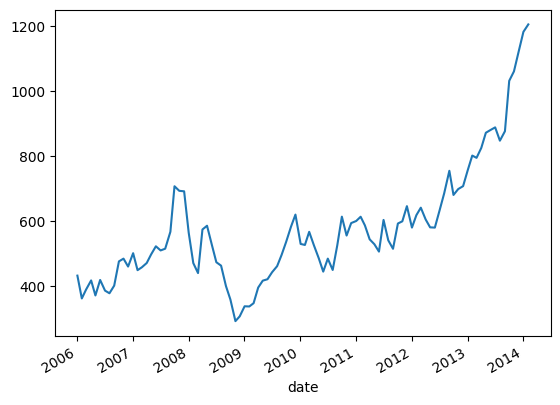

In [ ]:
goog = pd.read_csv("yahoo.csv", index_col=0)

goog.head()
goog = goog['close']

goog.sort_index(inplace=True)

goog.index = pd.DatetimeIndex(goog.index)

goog.plot()

Rééchantillonner les données pour avoir les prix de closure en moyenne à la fin de l'année d'affaire.  
Plot la variable close sans ss-echantillonage + avec l'échantillonage effectué

<Axes: xlabel='date'>

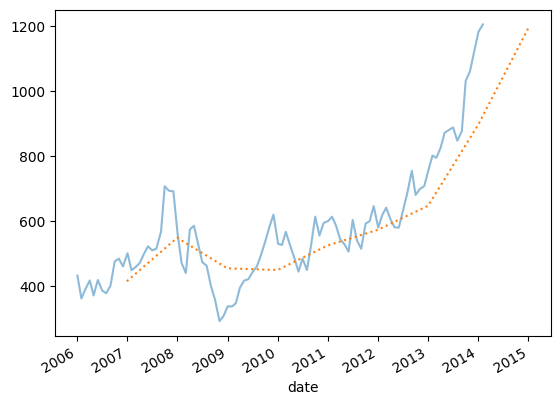

In [ ]:
# Sous-échantillonage annuel 
goog.resample('BA').mean()

# plot
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')

Changer la fréquence d'échantillonnage en journalier. Remplir les données manquantes en prenant les valeurs suivantes. Par les précédentes. Par des NaN. Se focaliser sur les 10 premières valeurs pour voir la différence. 

In [ ]:
# Sur échantillonnage avec NaN
goog.iloc[:10].asfreq('D')
# Sur-échantillonnage avec valeur précédente
goog.iloc[:10].asfreq('D', method='ffill')
# Sur-échantillonnage avec valeur suivante
goog.iloc[:10].asfreq('D', method='bfill')

date
2006-01-03    432.66
2006-01-04    362.62
2006-01-05    362.62
2006-01-06    362.62
2006-01-07    362.62
               ...  
2006-09-28    476.39
2006-09-29    476.39
2006-09-30    476.39
2006-10-01    476.39
2006-10-02    476.39
Freq: D, Name: close, Length: 273, dtype: float64

Appliquer une fréquence journalière sur le jeux de données. Décaler les donées de 900 jours. Décales les indices de 900 jours. 

<Axes: xlabel='date'>

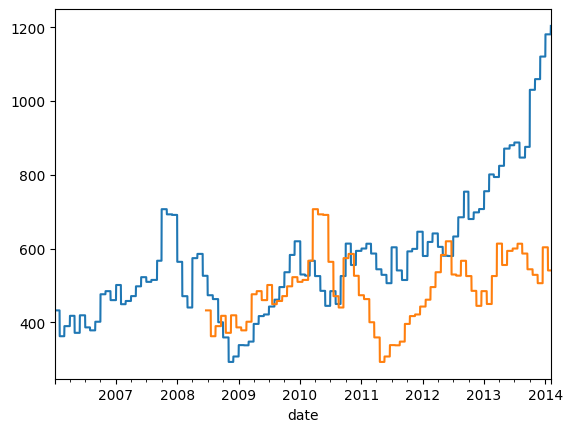

In [ ]:
# On applique une fréquence sur le jeux de données
goog = goog.asfreq('D', method='ffill')
# On décale le jeux de données de 900 jours
goog.shift(900)
# Plots
goog.plot()
goog.shift(900).plot()

Calculer le retour sur investissement sur une année des actions Google sur le dataset. Pour cela, diviser la différence entre la valeur des stocks il y a un an et celle d'ajourd'hui par la valeur d'aujourd'hui. 

<AxesSubplot:xlabel='Date'>

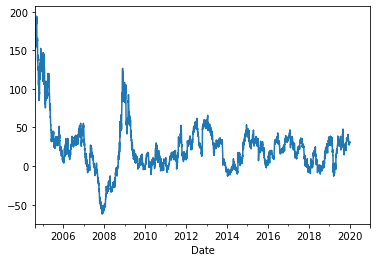

In [ ]:
(100 * (goog.shift(-365) / goog - 1)).plot()

Créer un DataFrame qui reprendra la valeur des actions en fermeture, la moyenne et l'écart-type de ceux-ci calculés avec une fenêtre glissante d'un an. 

<Axes: xlabel='date'>

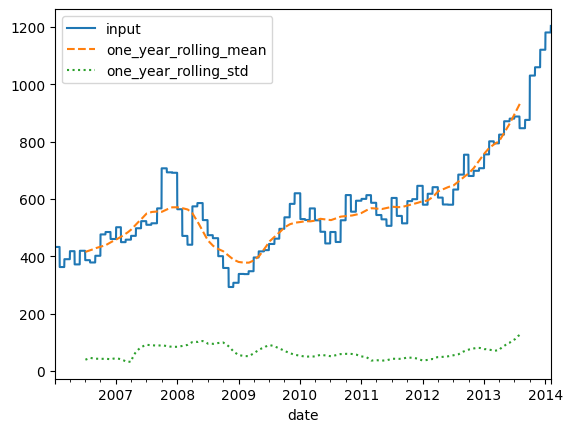

In [ ]:
# On crée la fenêtre glissante
rolling = goog.rolling(365, center=True)
# On crée le DataFrame
df = pd.DataFrame({'input': goog, 'one_year_rolling_mean': rolling.mean(), 'one_year_rolling_std': rolling.std()})
df.plot(style=['-', '--', ':'])